In [ ]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle

# Read in an image and grayscale it
image = cv2.imread('bridge_shadow.jpg')
#image = color_img[:, :, ::-1]
#image=image[:,50:150,:]
#image = mpimg.imread('bridge_shadow.jpg')  don't do this

image_filtered = cv2.GaussianBlur(image, (3, 3), 1)
gray_image = cv2.cvtColor(image_filtered, cv2.COLOR_BGR2GRAY)
gradient_x = cv2.Sobel(gray_image, cv2.CV_64F, 1, 0, 3)
gradient_y = cv2.Sobel(gray_image, cv2.CV_64F, 0, 1, 3)
abs_gradient_x = cv2.convertScaleAbs(gradient_x)
abs_gradient_y = cv2.convertScaleAbs(gradient_y)
kernel = np.ones((5,5),np.uint8)
#dilation_x = cv2.dilate(abs_gradient_x,kernel,iterations = 1)
#dilation_y = cv2.dilate(abs_gradient_y,kernel,iterations = 1)

#dilation_x = cv2.erode(abs_gradient_x,kernel,iterations = 1)
#dilation_y = cv2.erode(abs_gradient_y,kernel,iterations = 1)

#dilation_x = cv2.morphologyEx(abs_gradient_x, cv2.MORPH_OPEN, kernel)
#dilation_y = cv2.morphologyEx(abs_gradient_y, cv2.MORPH_OPEN ,kernel)

dilation_x = cv2.morphologyEx(abs_gradient_x, cv2.MORPH_GRADIENT, kernel)
dilation_y = cv2.morphologyEx(abs_gradient_y, cv2.MORPH_GRADIENT, kernel)

sobel_image = cv2.addWeighted(abs_gradient_x, 0.5, abs_gradient_y, 0.5, 0)
sobel_image_processed = cv2.cvtColor(sobel_image, cv2.COLOR_GRAY2BGR)

# Plot the resulte
f, ax = plt.subplots(2, 3, figsize=(24, 9))
f.tight_layout()
ax[0,0].imshow(image)
ax[0,0].set_title('Original Image', fontsize=20)
ax[0,1].imshow(abs_gradient_x, cmap='gray')
ax[0,1].set_title('Thresholded Gradient x', fontsize=20)
ax[0,2].imshow(abs_gradient_y, cmap='gray')
ax[0,2].set_title('Thresholded Gradient y', fontsize=20)
ax[1,0].imshow(sobel_image_processed)
ax[1,0].set_title('sobel_image_processed', fontsize=20)
ax[1,1].imshow(dilation_x, cmap='gray')
ax[1,1].set_title('Dilated Gradient x', fontsize=20)
ax[1,2].imshow(dilation_y, cmap='gray')
ax[1,2].set_title('Dilated Gradient y', fontsize=20)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

#image_without_blue = image.copy()
#image_without_blue[:, :, 0] = 0
(b, g, r) = cv2.split(image)

#(r, g, b) = cv2.split(image)
#b = image[:,:,0]
#g = image[:,:,1]
#r = image[:,:,2]

Blue = cv2.cvtColor(b, cv2.COLOR_GRAY2BGR)
Green = cv2.cvtColor(g, cv2.COLOR_GRAY2BGR)
Red = cv2.cvtColor(r, cv2.COLOR_GRAY2BGR)

fig, ax = plt.subplots(1, 3, figsize=(24, 9))
fig.tight_layout()
ax[0].imshow(Blue)
ax[0].set_title('Blue', fontsize=20)
ax[1].imshow(Green)
ax[1].set_title('Green', fontsize=20)
ax[2].imshow(Red)
ax[2].set_title('Red', fontsize=20)

#test= b.copy()
#tf = (b < 10) & (r > 100) & (g > 100)
#tf.astype(np.int)
#result=test*tf
#test1=cv2.cvtColor(result, cv2.COLOR_GRAY2BGR)


# binary_output[(scaled_sobel >= thresh_min) & (scaled_sobel <= thresh_max)] = 1

#h, ax = plt.subplots(1, 3, figsize=(24, 9))
#h.tight_layout()
#ax[0].imshow(image)
#x[0].set_title('Original Image', fontsize=20)
#ax[1].imshow(test1)
#ax[1].set_title('Test', fontsize=20)
#ax[2].imshow(test1)
#ax[2].set_title('Test', fontsize=20)

In [ ]:
Blue.shape

In [ ]:
b.shape

In [ ]:
720*1280

In [ ]:
b.reshape((720, 1280))

In [ ]:
c = (r > np.mean(r)) & (g > np.mean(g))
#c = (b < np.mean(b)) & (r > np.mean(r)) & (g >np.mean(g))
c.astype(np.int)
d=r*c
test1=cv2.cvtColor(d, cv2.COLOR_GRAY2BGR)
plt.imshow(test1)

In [ ]:
print(np.mean(r),np.mean(g),np.mean(b))

In [ ]:
image = cv2.imread('bridge_shadow.jpg')

(b, g, r) = cv2.split(image)

c1 = (b < np.mean(b)) & (r > np.mean(r)) & (g > np.mean(g))
c1.astype(np.int)
c2 = (b > np.mean(b)) & (r > np.mean(r)) & (g > np.mean(g))
c2.astype(np.int)

#c = (b < np.mean(b)) & (r > np.mean(r)) & (g >np.mean(g))
d1=r*c1
d2=r*c2
test1=cv2.cvtColor(d1, cv2.COLOR_GRAY2BGR)
test2=cv2.cvtColor(d2, cv2.COLOR_GRAY2BGR)

fig1, ax = plt.subplots(1, 3, figsize=(24, 9))
fig1.tight_layout()
ax[0].imshow(image)
ax[0].set_title('Original Image', fontsize=20)
ax[1].imshow(test1)
ax[1].set_title('Test1', fontsize=20)
ax[2].imshow(test2)
ax[2].set_title('Test2', fontsize=20)



Text(0.5, 1.0, 'find the while line')

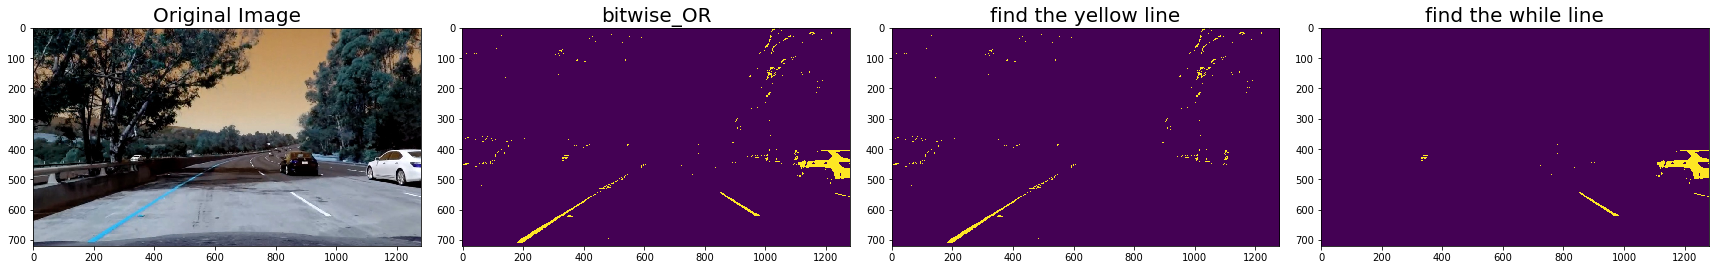

In [2]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
image = cv2.imread('bridge_shadow.jpg')

(b, g, r) = cv2.split(image)

c1 = (b < np.mean(b)-10) & (r > np.mean(r)) & (g > np.mean(g))
#c1.astype(np.int)
c2 = (b > np.mean(b)+120) & (r > np.mean(r)+120) & (g > np.mean(g)+120)
#c2.astype(np.int)

#c = (b < np.mean(b)) & (r > np.mean(r)) & (g >np.mean(g))
binary_1 = np.zeros_like(b)
binary_2 = np.zeros_like(b)

binary_1[c1]=1
binary_2[c2]=1

bitwise_or = cv2.bitwise_or(binary_1, binary_2)

#test1=cv2.cvtColor(binary_1, cv2.COLOR_GRAY2BGR)
#test2=cv2.cvtColor(binary_2, cv2.COLOR_GRAY2BGR)

fig1, ax = plt.subplots(1, 4, figsize=(24, 9))
fig1.tight_layout()
ax[0].imshow(image)
ax[0].set_title('Original Image', fontsize=20)
ax[1].imshow(bitwise_or)
ax[1].set_title('bitwise_OR', fontsize=20)
ax[2].imshow(binary_1)
ax[2].set_title('find the yellow line', fontsize=20)
ax[3].imshow(binary_2)
ax[3].set_title('find the while line', fontsize=20)

In [ ]:
r.shape

In [ ]:
binary_1

In [ ]:
c1.shape

In [ ]:
c1

In [ ]:
d1

In [ ]:
binary_1

In [ ]:
b.shape